### Piano Spectrum Survey
#### Jai Jeffryes
#### March 11, 2018

In my last notebook, I examined the spectrum of a single piano tone and synthesized a sound based on the harmonics I observed. I was surprised to observe that the harmonic series of that piano tone consisted of integer multiples, not of the fundamental frequency, but instead, half the frequency of the fundamental. In other words, the perceived fundamental appeared not to be the fundamental at all! The true fundamental had a very low amplitude. The dominant frequency was actually the first partial, namely an octave above that. The second partial was a fifth obove that, and so on in the harmonic series. In relation to the dominant frequency, it sounded as if the harmonic series was compressed.

That was such a departure from my understanding of the acoustics of the piano, I had to find out how many piano notes sound like that. Do they all sound like that? Is this an exception? Is it a property of wound strings?

Since I would be looking at every note on a piano, I needed to do pick up some beginning iteration tricks in Python. I also needed to learn a few basics of plotting. Some of my plotting fails were kind of amusing and pretty.

The piano samples comes from a Steinway B-211 sampled by KaleidonKep99 on GitHub. Later, it should be fun and instructive to record samples of each note on my own piano and run this whole thing again. The automation is easy now.

https://github.com/KaleidonKep99/Steinway-B-211

I use Python tools from Allen Downey's book about digital signal processing, *Think DSP*. His code is available on GitHub.

https://github.com/AllenDowney/ThinkDSP.

* Import Allen's modules and Python's numpy for numerical calculations.
* Import pyplot, too, even though Allen wraps many of these functions in his own module, thinkplot. I need some pyplot functions he doesn't include in his thinkplot module, or doesn't explain in his book. I can just use pyplot directly myself.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import matplotlib.pyplot as plt

import os # for file manipulation

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

In [2]:
cwd = os.getcwd()
print(cwd)
# os.listdir('Samples')

/Users/jai/Documents/Computing/GitHub/Piano_AnalysisSynthesis_FirstTry


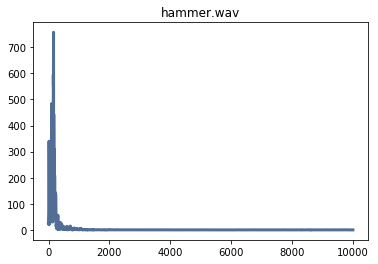

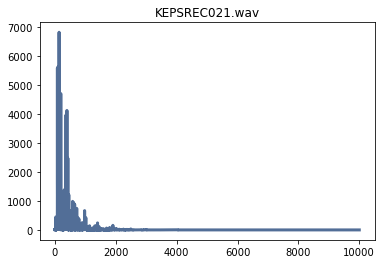

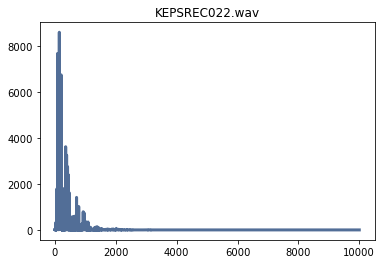

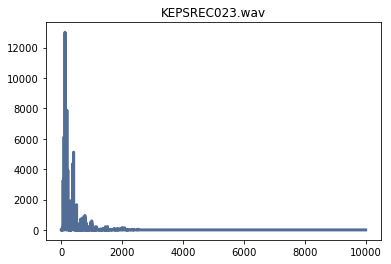

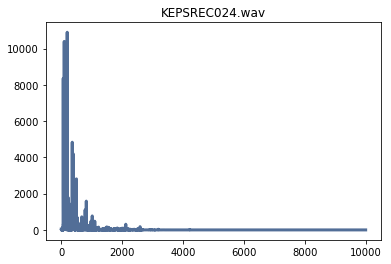

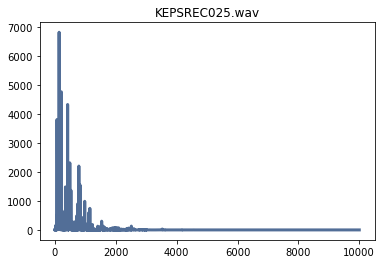

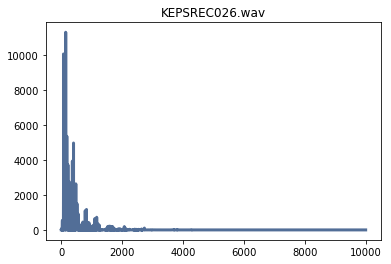

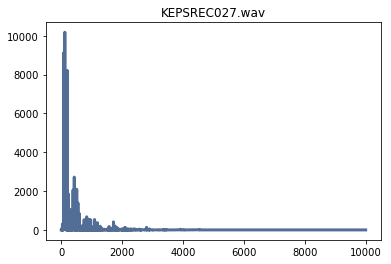

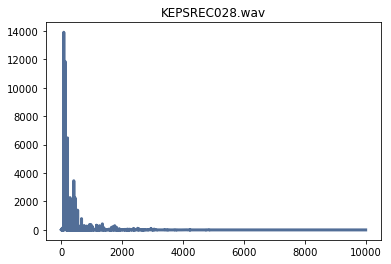

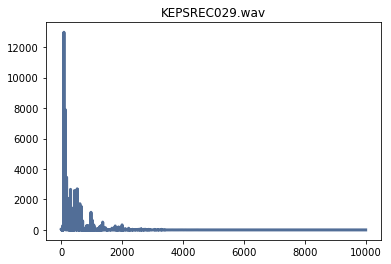

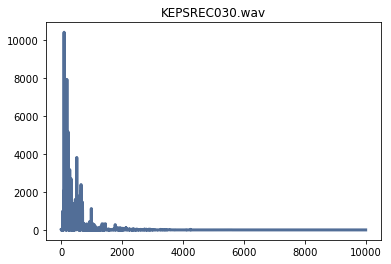

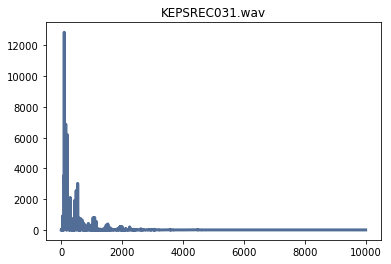

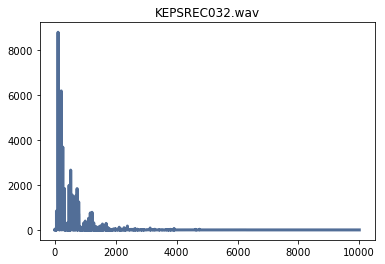

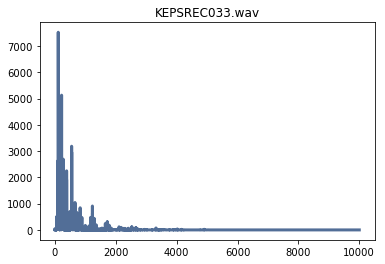

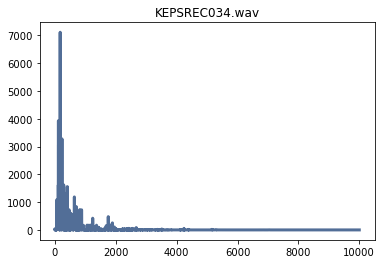

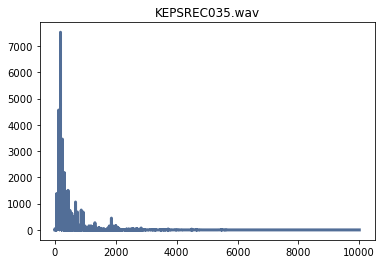

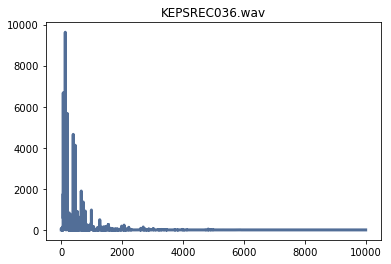

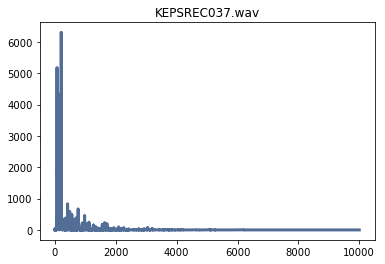

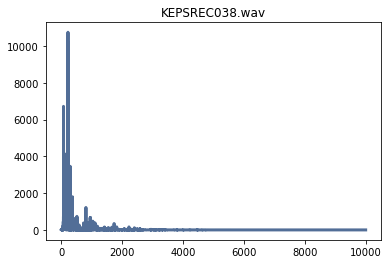

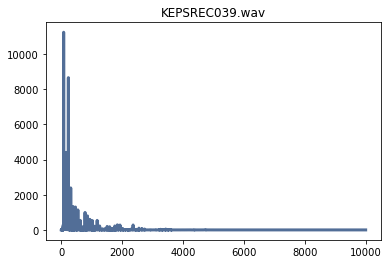

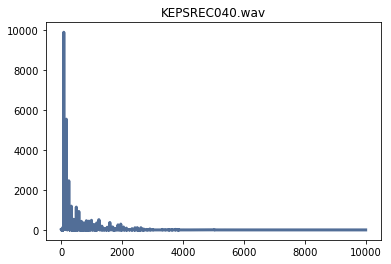

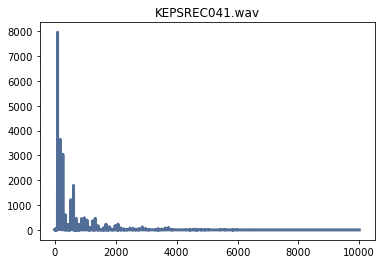

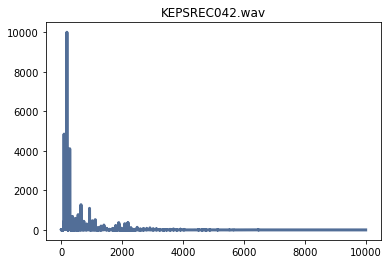

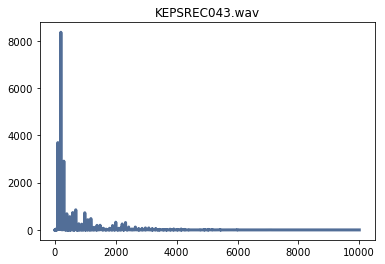

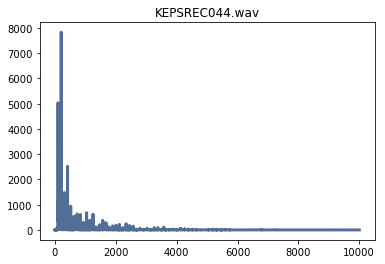

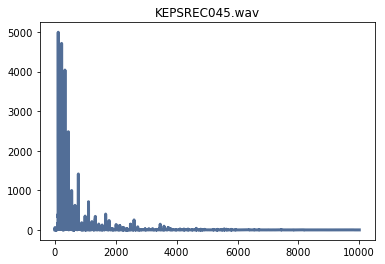

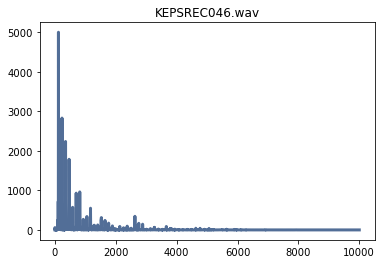

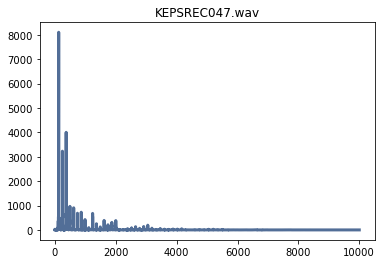

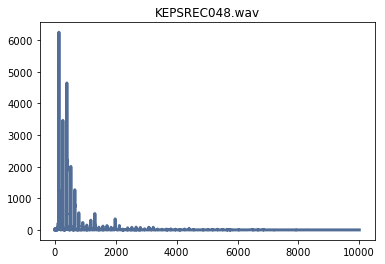

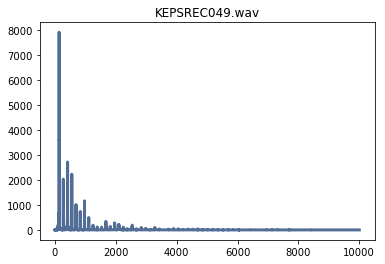

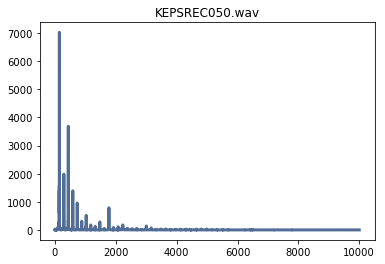

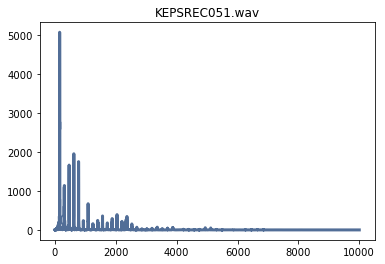

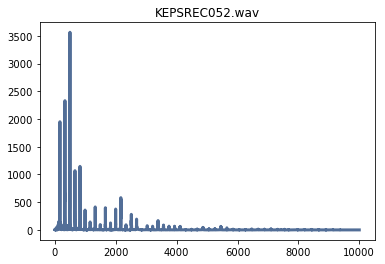

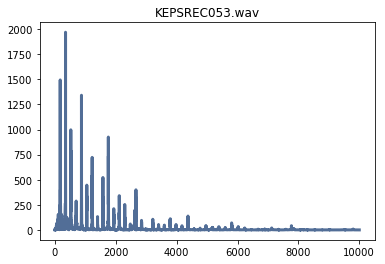

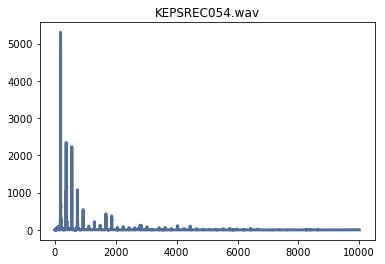

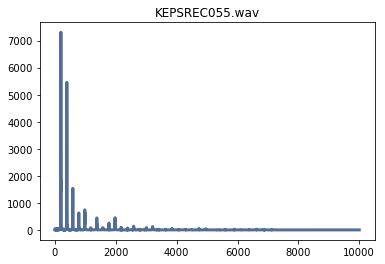

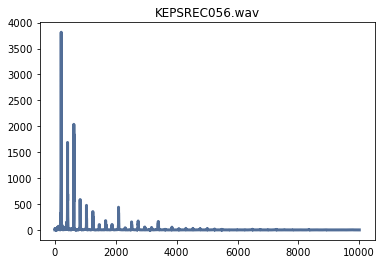

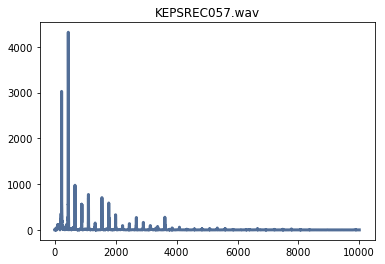

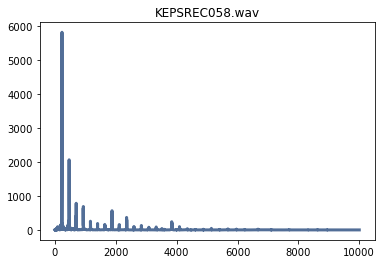

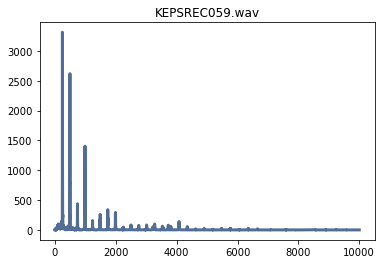

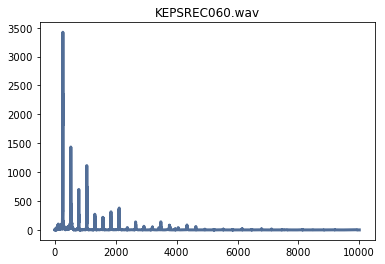

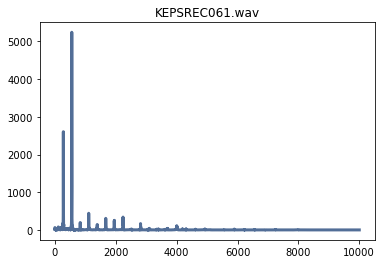

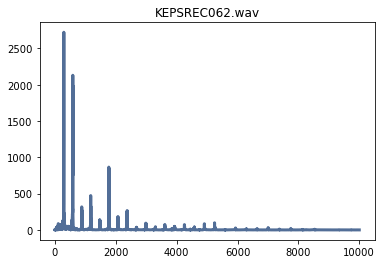

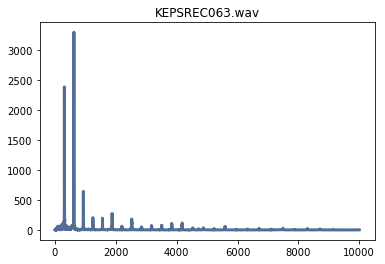

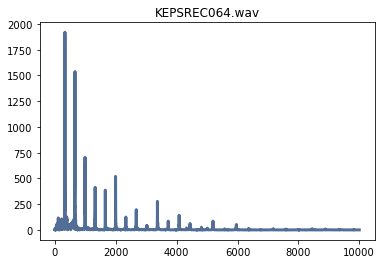

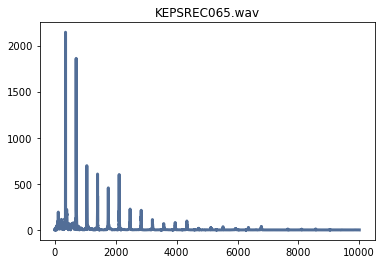

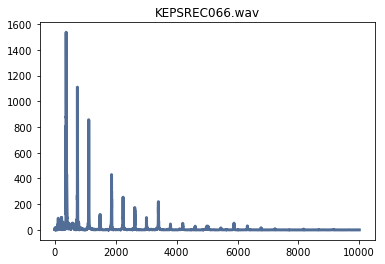

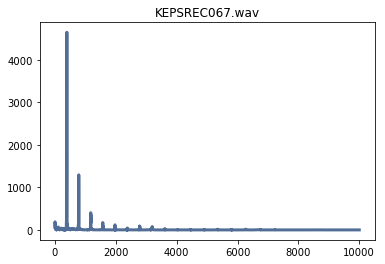

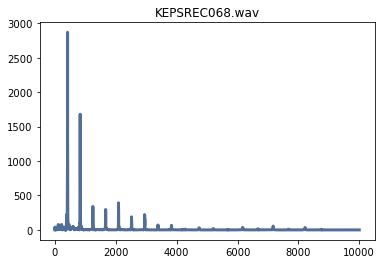

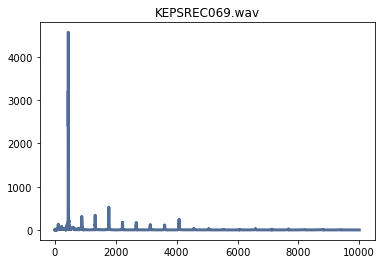

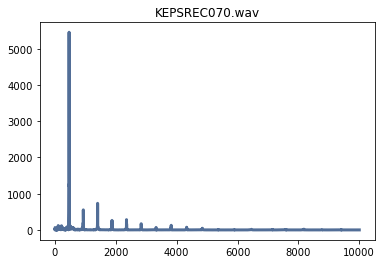

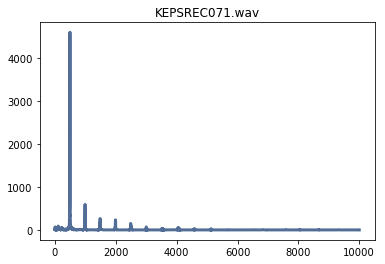

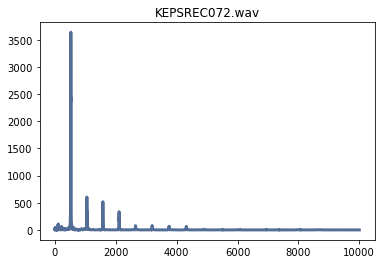

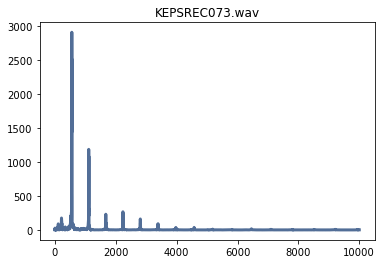

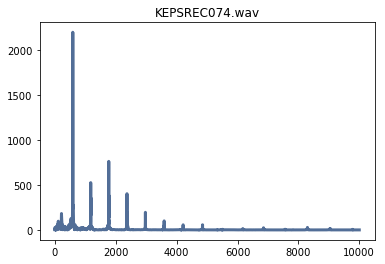

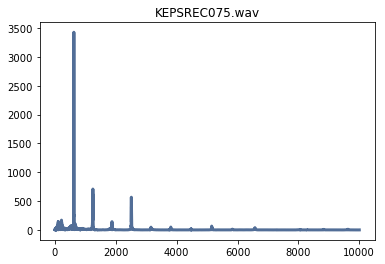

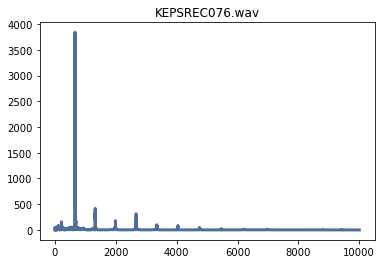

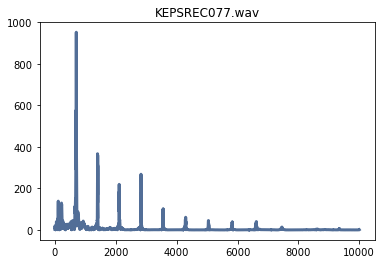

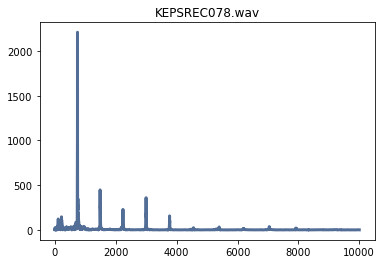

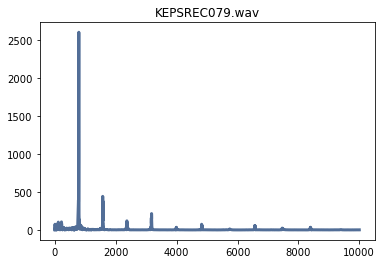

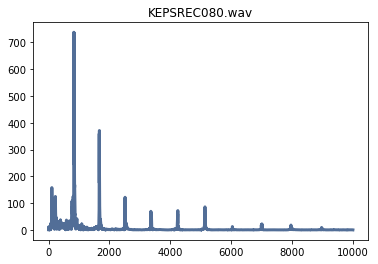

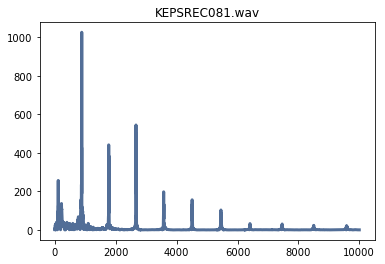

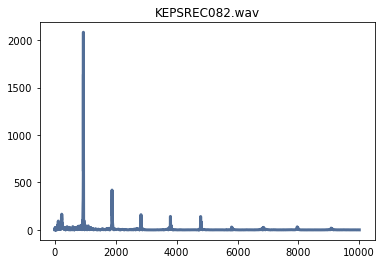

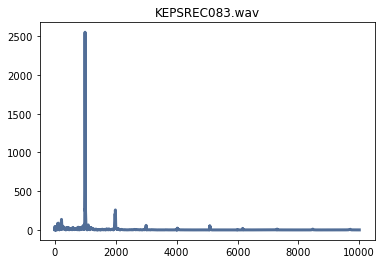

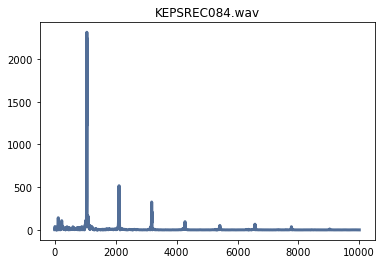

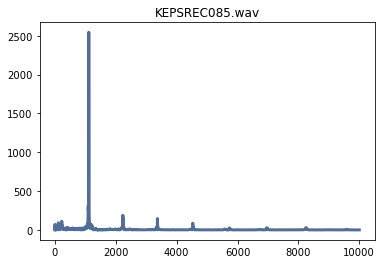

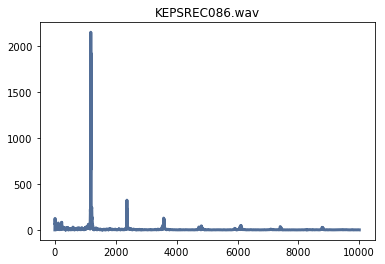

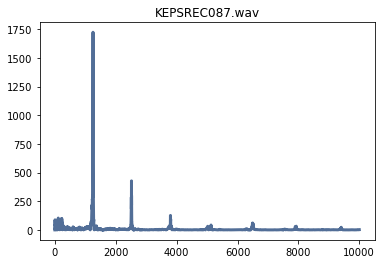

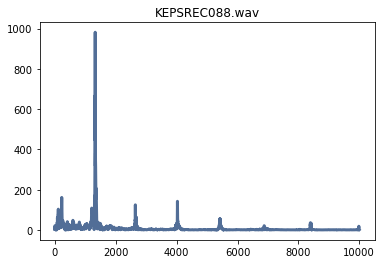

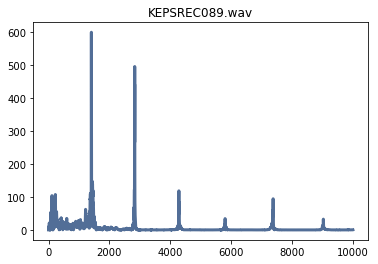

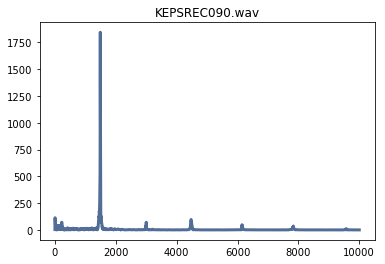

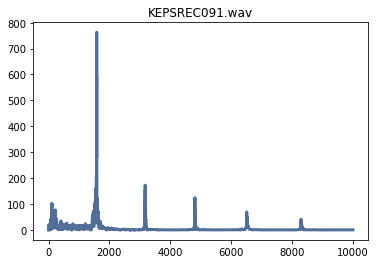

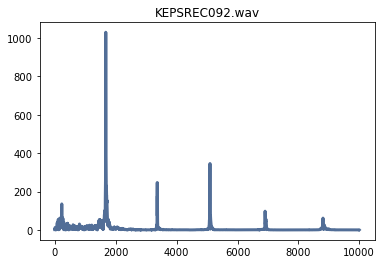

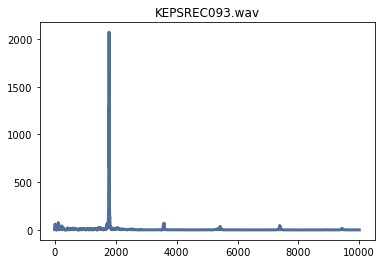

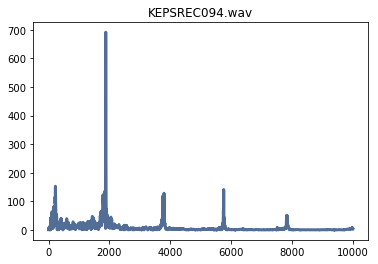

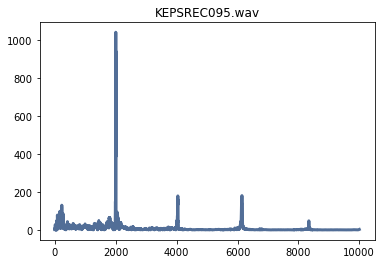

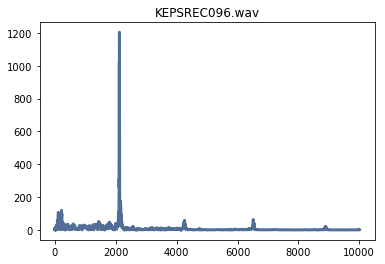

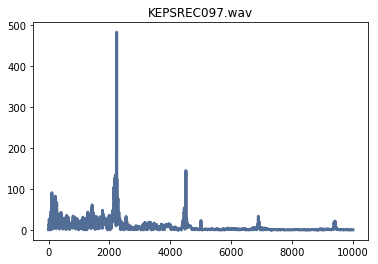

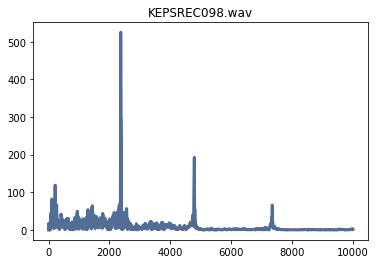

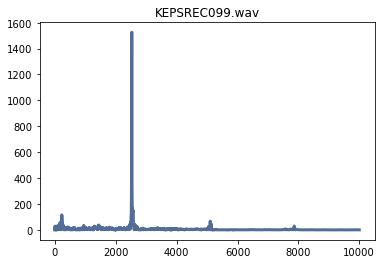

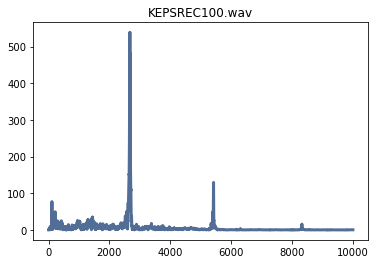

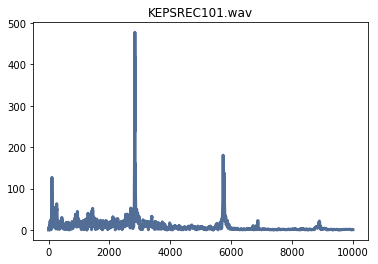

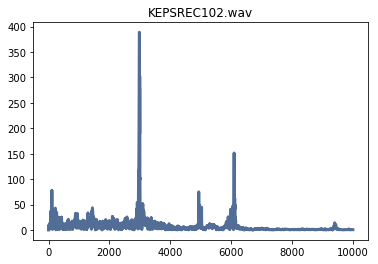

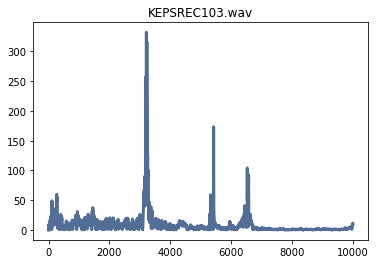

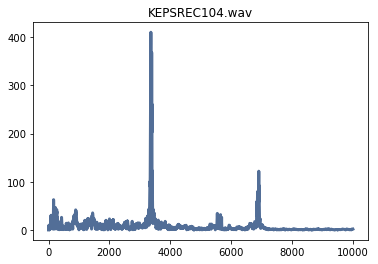

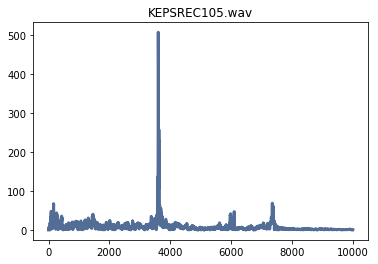

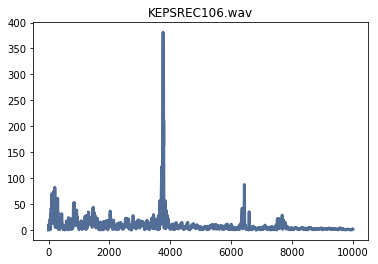

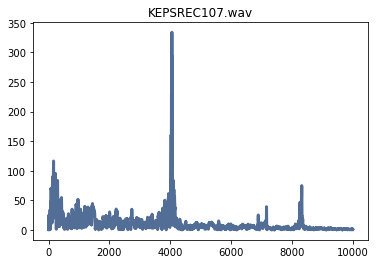

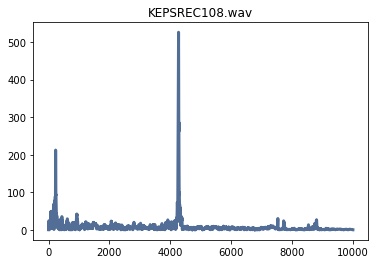

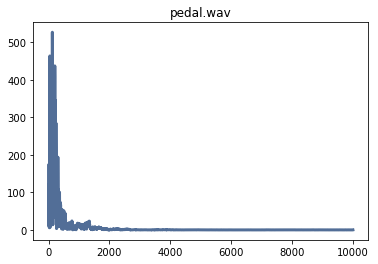

In [3]:
dirname = 'Samples'
fils = os.listdir(dirname)

for fn in fils:
    path = os.path.join(dirname, fn)
    wave = thinkdsp.read_wave(path)
    wave.normalize()
    segment_5 = wave.segment(start=0, duration=5)
    spectrum = segment_5.make_spectrum()
    spectrum.plot(high=10000)
    thinkplot.config(
        title=fn)
    plt.show()
    plt.close()


In [3]:
dirname = 'Samples'
fils = os.listdir(dirname)
# print(fils)

wavs = []
spectrums = []
for i in fils:
    path = os.path.join(dirname, i)
    # print(path)
    thinkdsp.read_wave(path)
    #wav = thinkdsp.read_wave(path)
    #seg = wav.segment(start=0, duration=5)
    #spec = seg.make_spectrum()
    wavs.append(wav)
    spectrums.append(spec)

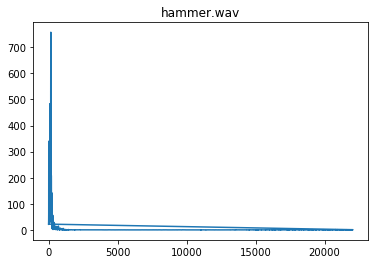

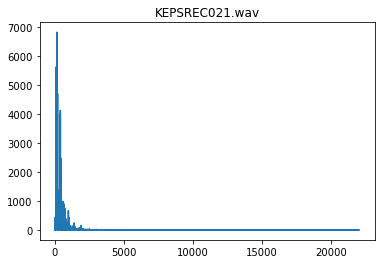

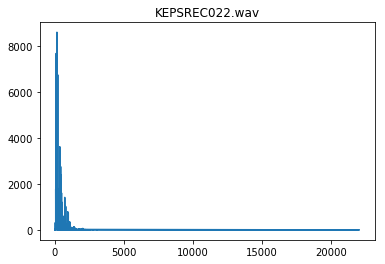

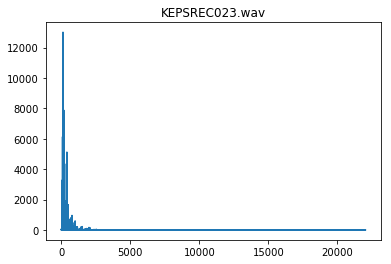

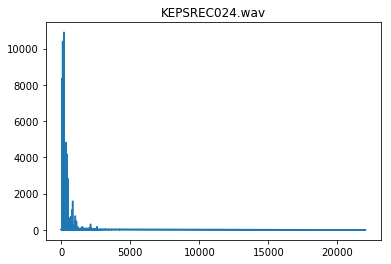

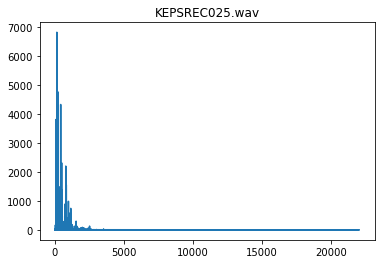

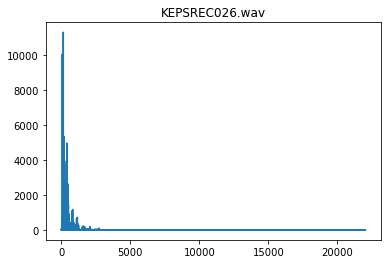

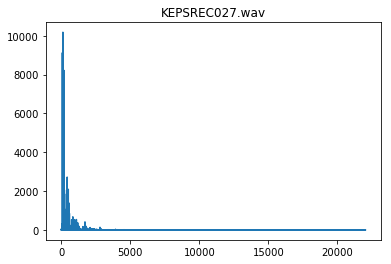

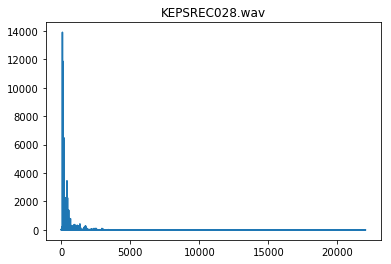

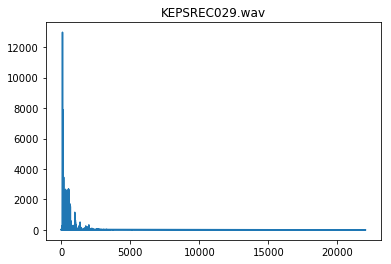

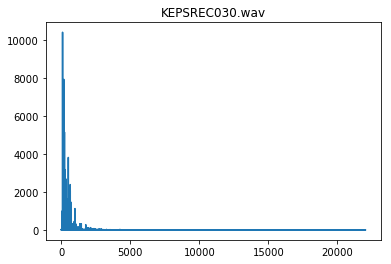

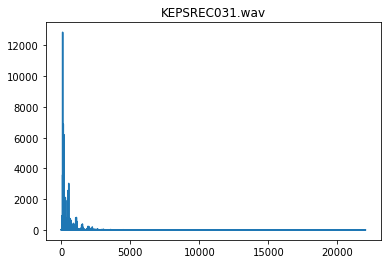

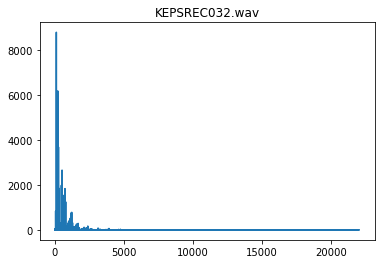

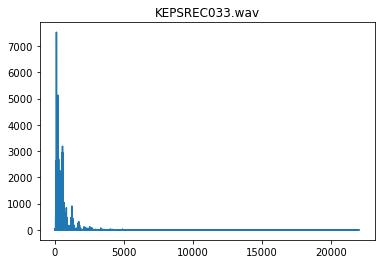

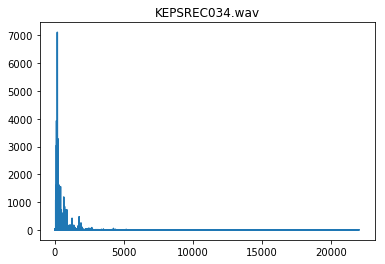

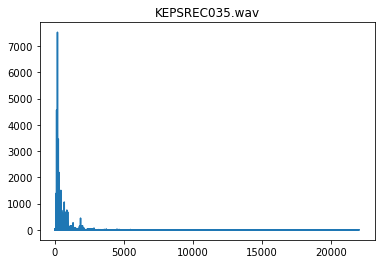

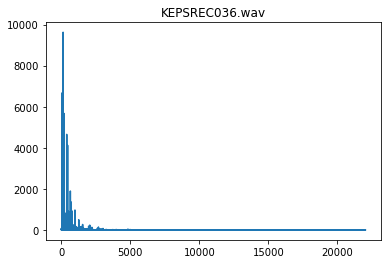

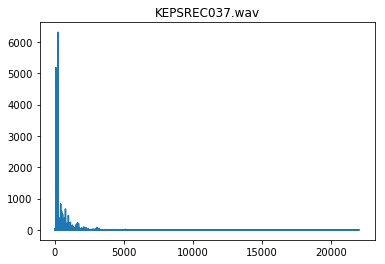

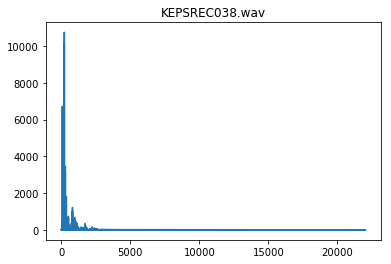

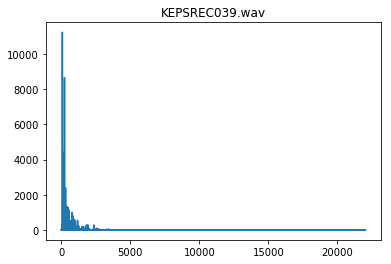

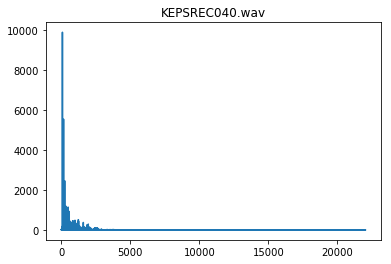

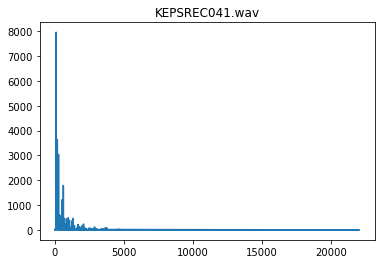

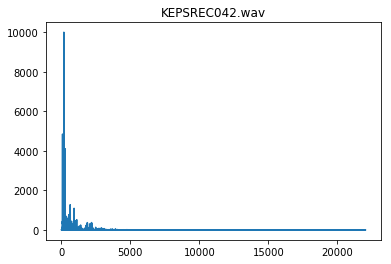

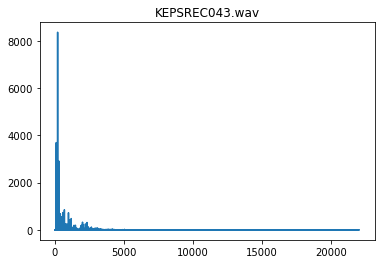

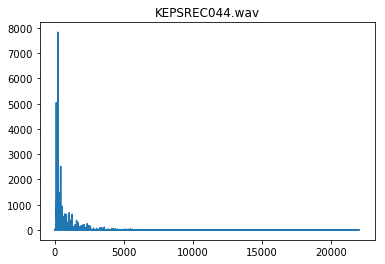

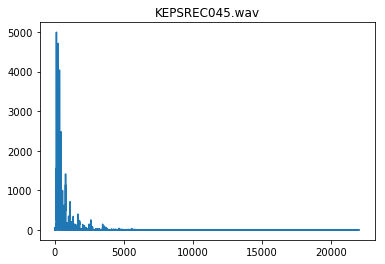

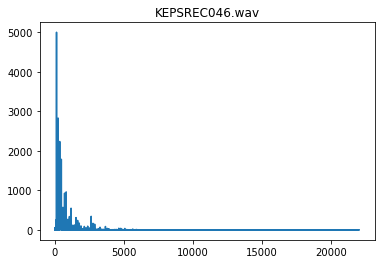

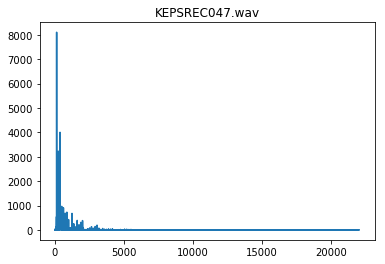

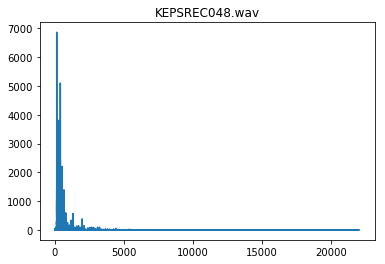

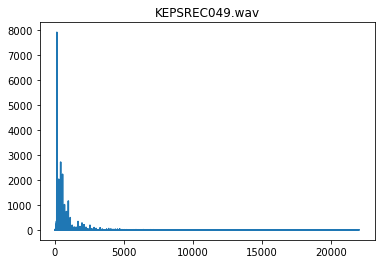

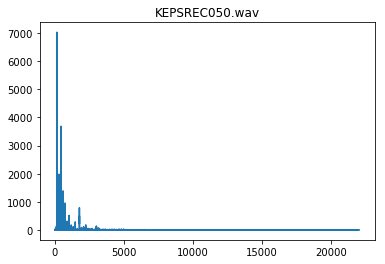

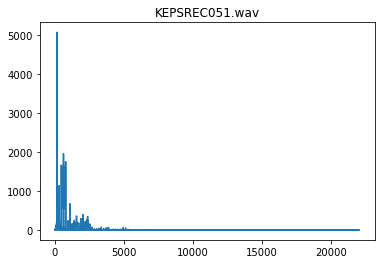

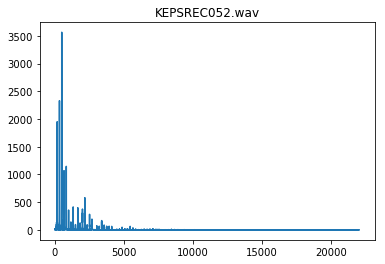

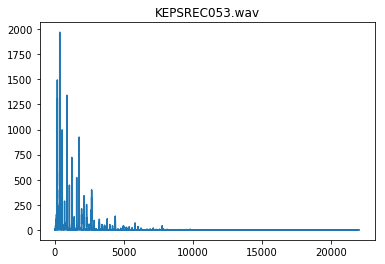

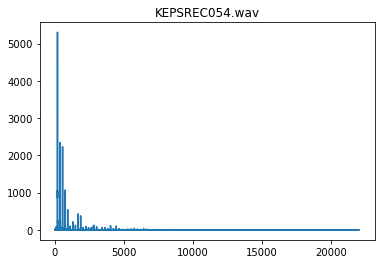

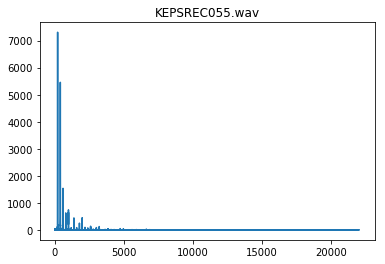

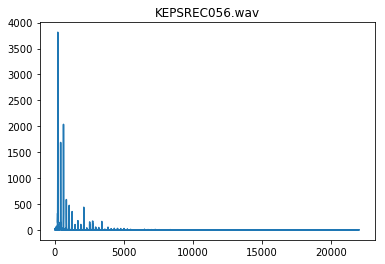

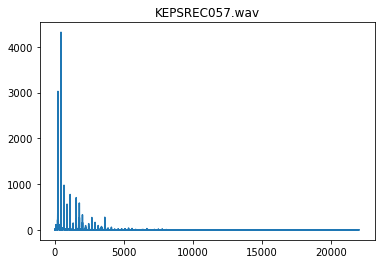

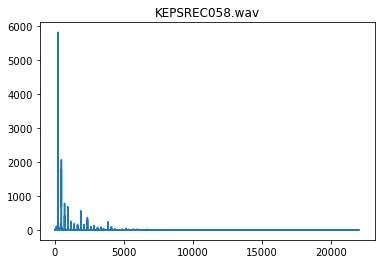

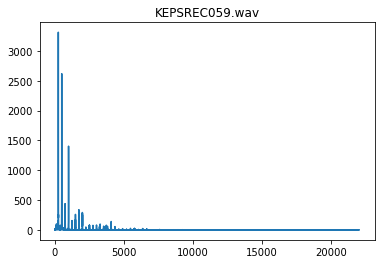

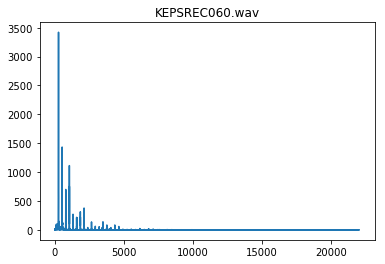

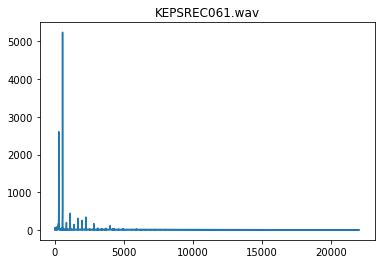

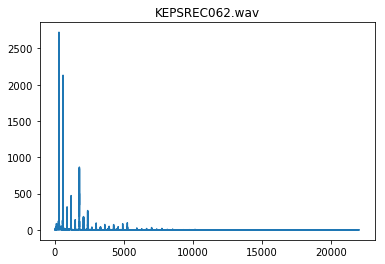

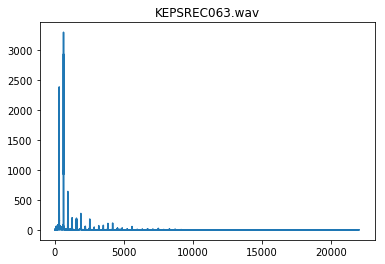

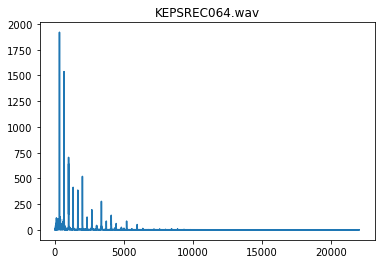

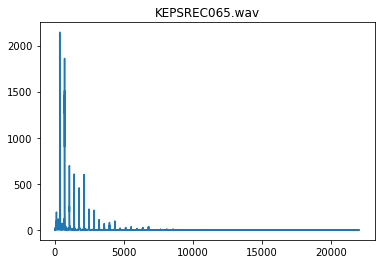

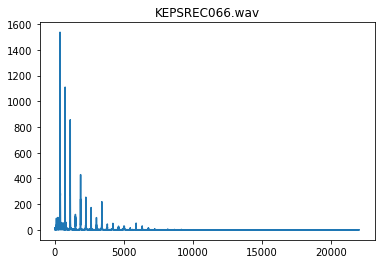

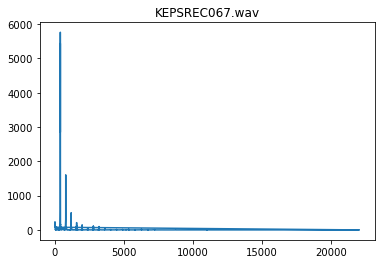

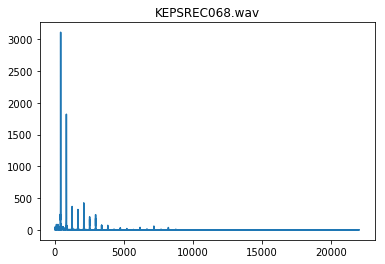

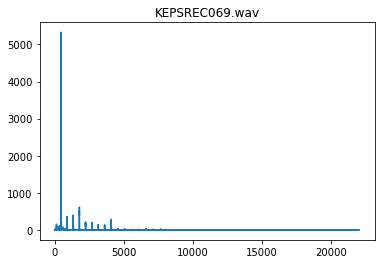

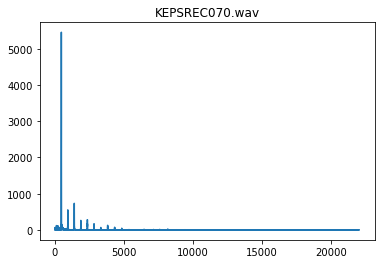

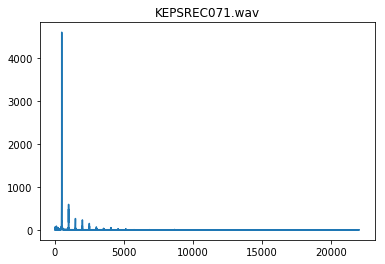

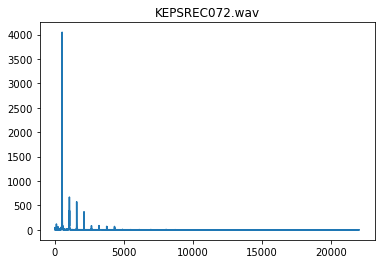

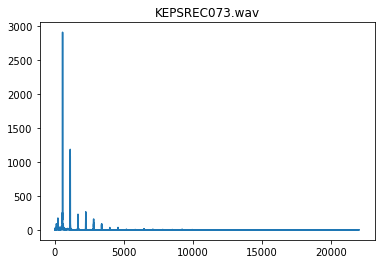

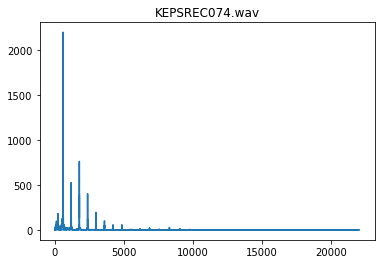

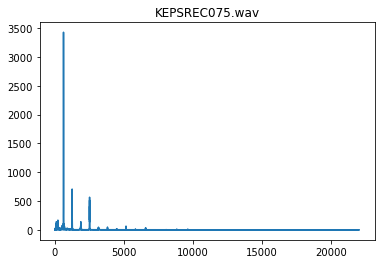

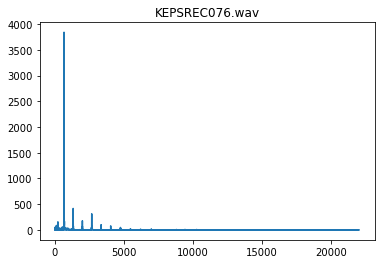

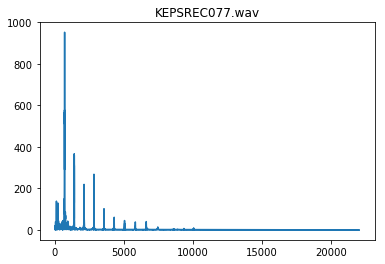

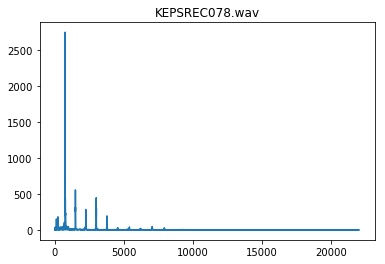

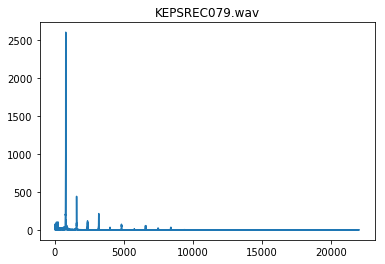

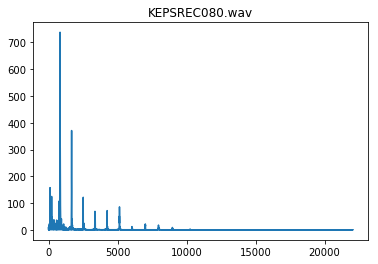

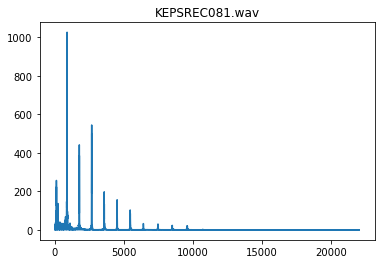

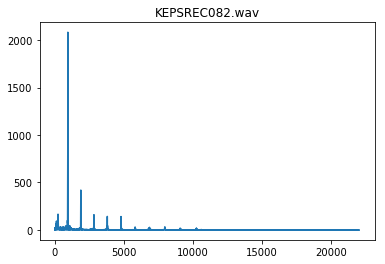

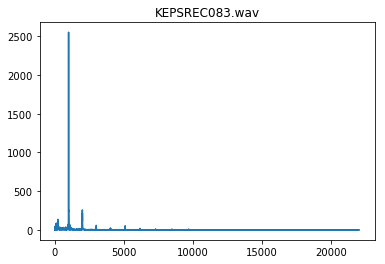

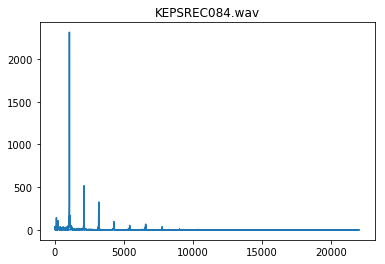

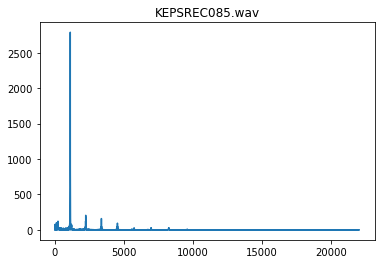

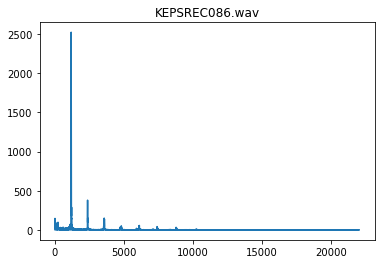

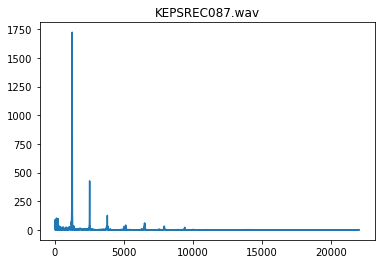

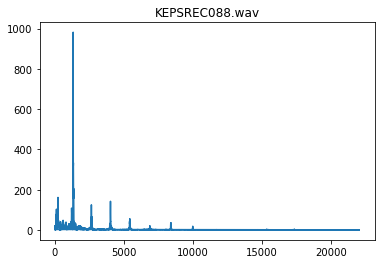

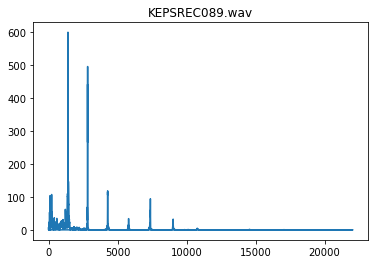

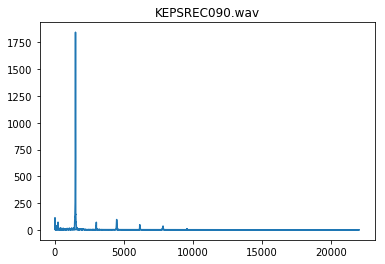

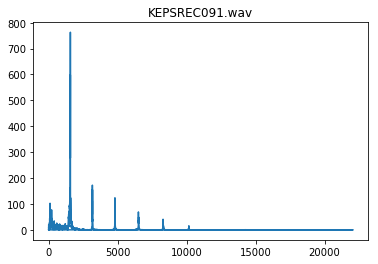

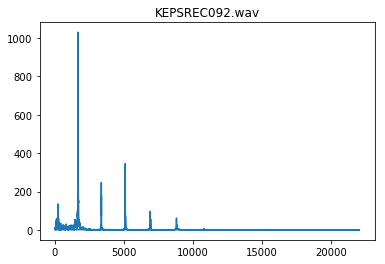

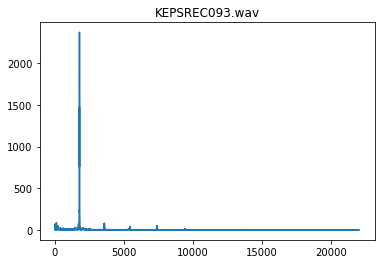

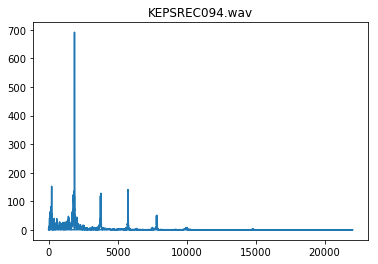

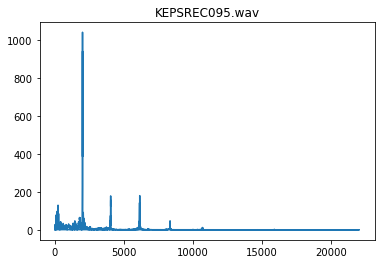

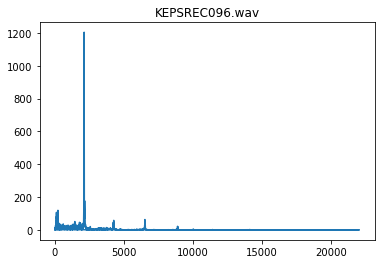

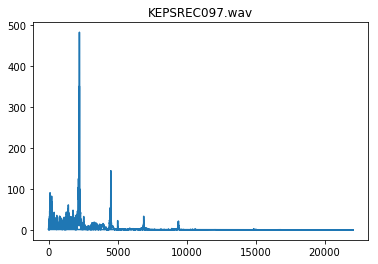

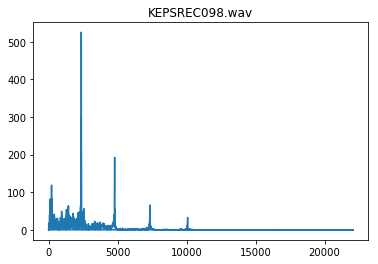

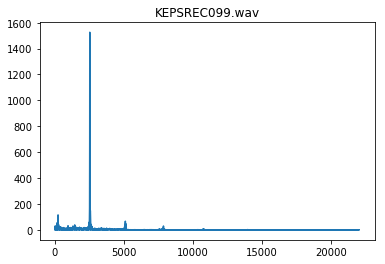

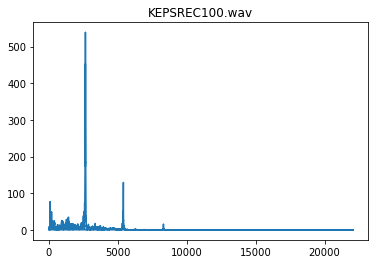

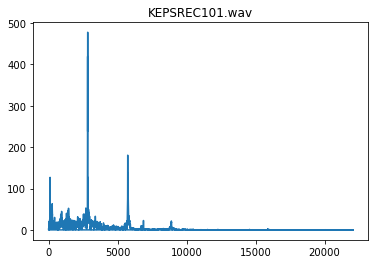

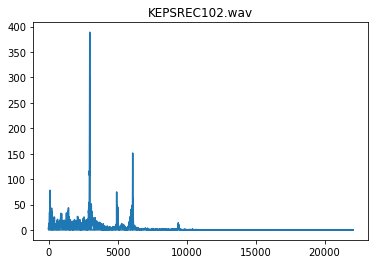

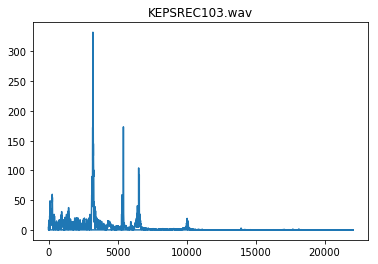

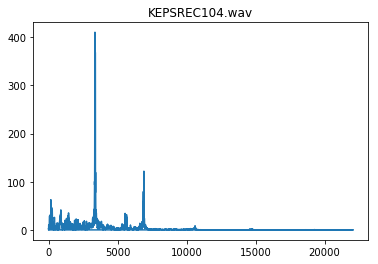

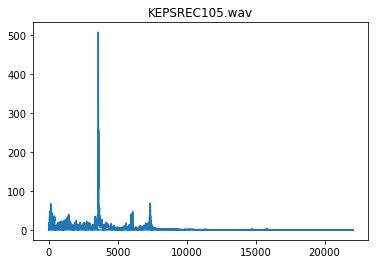

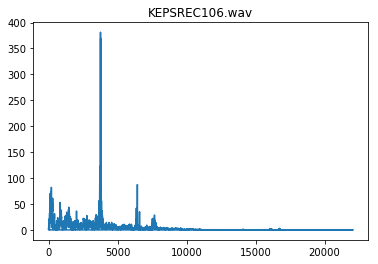

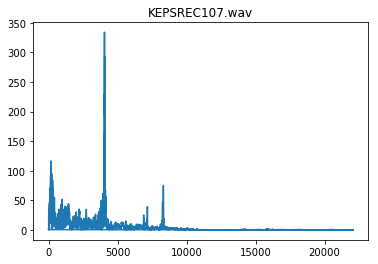

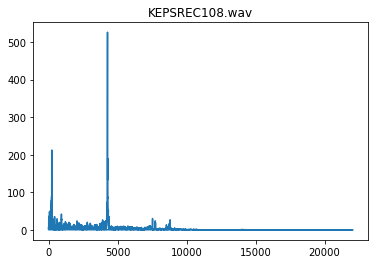

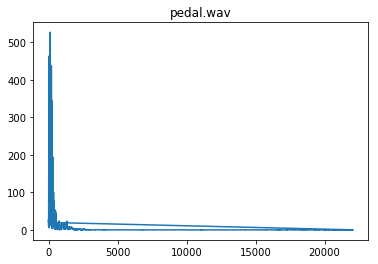

In [13]:
i = 0
for f, s in zip(fils, spectrums):
    i+=1
    fs, amps = s.render_full()
    # print(fs)
    # print(amps)
    # print(f)
    plt.plot(fs,amps)
    plt.title(f)
    plt.show()
    plt.close()
    

Read the sample, plot the waveform, 
and play it back.

In [ ]:
wave = thinkdsp.read_wave('KEPSREC030.wav')
wave.normalize()
wave.plot()
thinkplot.config(xlabel='Time (s)')

In [ ]:
wave.make_audio()

Let's look at a shorter segment. I don't need the long envelope.

In [ ]:
segment_5 = wave.segment(start=0, duration=5)
segment_5.plot()
thinkplot.config(
    xlabel='Time (s)',
    ylabel='Amplitude')

In [ ]:
segment_5.make_audio()

Zoom in on the waveform.

In [ ]:
segment_01 = segment_5.segment(start=0, duration=0.01)
segment_01.plot()

Wow, there is a lot going on in that function. Let's do a Fourier Transform and look at the spectrum.

In [ ]:
spectrum = segment_5.make_spectrum()
spectrum.plot(high=1500)

The mix of those upper partials is fantastic. However, since I'm going to synthesize this by hand, I'm just going to consider the dominant lower ones. Narrow the spectrum plot to frequencies below 800 Hz.

In [ ]:
spectrum = segment_5.make_spectrum()
spectrum.plot(high=800)

#### Analysis
Here is where my head starts to swim a little. What does this tell me? A lot of surprising things.

- The pitch is F-sharp 2, whose frequency is 92.4986 Hz. Yes, I see the fundamental there, but what's that spike at about 49 Hz doing there? Since Fourier doesn't tell you the time of the onset of the frequency, I can only speculate now. Maybe that's hammer noise. I suppose I could do a Short Time Fourier Transform to locate it in time. If it happens early in the sample, I could analyze recordings of other notes to see if the same 49 Hz shows up, suggesting it isn't a property of the string.
- What's that thing doing there at about 140 Hz? I'll tell you what, rocking my world. I thought the first overtone would show up at 184 Hz, namely an octave above the fundamental.
- Something else about that. All the overtones are spaced about 49 Hz apart. I guess the presence of 49 Hz is a property of the string after all. What is it about piano acoustics that generates an overtone series that is integer multiples, not of the fundamental frequency, but the fundamental divided by 2? That's far out.
- All that low level energy between 92 Hz and 140 Hz. Is that a change over time? I'll need a STFT to tell.
- Heaps around the bases of the partials. Now, the Fourier Transform does produce some artifacts due to windowing, but I question that in this case. When I started using electronic aids to piano tuning, I realized for the first time that the pitch of a single piano note can change over time. I speculate that when a string is first displaced it is stretched to produce a slightly sharper pitch that drops as the amplitude of the string calms down. I don't know what I'm talking about and I'm totally guessing, but could that be what I'm seeing in this spectrum?

Let's take a look at the peak values producing this plot. We'll look at the highest points and their corresponding frequencies in descending order.

(Time to scroll a bit...)

In [ ]:
spectrum.peaks()[:100]

- When you browse the top frequencies from this spectrum, it's pretty interesting to see the presence of multiple peaks centered at different frequencies around 92 Hz. Why this cluster? Three piano strings! Could be, but don't forget the Fourier Transform measures all frequencies over a window of time. The frequency can change over the course of that window.
- Note that the standard frequency of F-sharp 2 is 92.4986 Hz. This piano is just a smidgeon flat.
- As I noted, there are peaks at 138 Hz. That's C-sharp only a fifth above the fundamental. That's not what I expected! I thought the fifth didn't show up in a piano's overtones until an octave higher than that. I'll synthesize it and see of it sounds piano-like.
- 184 Hz makes sense. That's the second harmonic, an octave above the fundamental.
- 230 Hz is a flat A-sharp
- 323 Hz falls between a D-sharp and an E-natural. Out-of-tune harmonics.
- 509 Hz falls between a B and a C-natural.
- Etc...

#### Synthesis
What I would really like to do is take mathematical averages around each cluster of frequencies and use those to define ratios for the harmonics I want to synthesize. I don't know how to do that, and Allen said that is hard. I've been studying the math of the Fourier Transform to see what that gets me.

Meanwhile, I know some things from analyzing the plot and examining top data points of the spectrum, so I'm going to blend sinusoids by hand. I'm just going to do 10 partials. I'm omitting the "under-partial" below the fundamental for now. Later, I'll compare the sound of putting that in.

In [ ]:
# Set the fundamental frequency to F-sharp 2. In tune!
freq_fund = 92.4986

# Set the frequencies of 9 partials. Use ratios I eyeballed from the frequency list in the Fourier Transform
freq_par1 = freq_fund * (138.80 / 92.0)
freq_par2 = freq_fund * (184.30 / 92.0)
freq_par3 = freq_fund * (230.35 / 92.0)
freq_par4 = freq_fund * (276.60 / 92.0)
freq_par5 = freq_fund * (322.80 / 92.0)
freq_par6 = freq_fund * (461.85 / 92.0)
freq_par7 = freq_fund * (508.80 / 92.0)
freq_par8 = freq_fund * (555.05 / 92.0)
freq_par9 = freq_fund * (649.00 / 92.0)

# Set amplitudes for each partial. I'm just kind of estimating them from looking at the plot.
amp_fund = 1
amp_par1 = 8/14.0
amp_par2 = 8/14.0
amp_par3 = 8/14.0
amp_par4 = 4/14.0
amp_par5 = 3.5/14.0
amp_par6 = .5/14.0
amp_par7 = 2/14.0
amp_par8 = 2/14.0
amp_par9 = 4/14.0

# I'm not going to shift any of the phases. It's inaudible anyway.
phase = 0

# Create sinusoids for each partial. This only defines a function. It doesn't turn it into a sound yet.
sin_sig1 = thinkdsp.SinSignal(freq_fund, amp_fund, phase)
sin_sig2 = thinkdsp.SinSignal(freq_par1, amp_par1, phase)
sin_sig3 = thinkdsp.SinSignal(freq_par2, amp_par2, phase)
sin_sig4 = thinkdsp.SinSignal(freq_par3, amp_par3, phase)
sin_sig5 = thinkdsp.SinSignal(freq_par4, amp_par4, phase)
sin_sig6 = thinkdsp.SinSignal(freq_par5, amp_par5, phase)
sin_sig7 = thinkdsp.SinSignal(freq_par6, amp_par6, phase)
sin_sig8 = thinkdsp.SinSignal(freq_par7, amp_par7, phase)
sin_sig9 = thinkdsp.SinSignal(freq_par8, amp_par8, phase)
sin_sig10 = thinkdsp.SinSignal(freq_par9, amp_par9, phase)

# Put these signals in a Vitamix. What comes out?
mix_sig = sin_sig1 + sin_sig2 + sin_sig3 + sin_sig4 + sin_sig5 + sin_sig6 + sin_sig7 + sin_sig8 + sin_sig9 + sin_sig10
mix_sig.plot()
thinkplot.config(xlabel='Time (s)')

Compare to the real piano. You can't tell a lot, I don't think. That's the point of Fourier analysis.

In [ ]:
segment_01.segment(start=0, duration=0.01).plot()

Build the wave from the synthesized signal.

In [ ]:
duration = 5
start = 0
framerate = 11025
mix_wave = mix_sig.make_wave(duration=duration, start=start, framerate=framerate)

Review the piano sample spectrum

In [ ]:
spectrum.plot(high=1000)

Listen to the original.

In [ ]:
segment_5.make_audio()

Compare the spectrum of the synthesized wave. Hmmm. My recipe isn't quite right. I missed a couple partials and the proportions can be improved.

In [ ]:
high = 1000
mix_spectrum = mix_wave.make_spectrum()
mix_spectrum.plot(high=high)
thinkplot.config(xlabel='Frequency (Hz)')

In spite of the flat envelope and being off with my recipe, I think it's pretty nice how closely this resembles the sustained piano sound.

In [ ]:
mix_wave.make_audio()

#### Second synthesis attempt
I'm copying and pasting my first attempt. This solution is screaming for generalization, but what the heck, I'm just proving the concept right now. This solution overwrites my variables for building the signal, but I'll build the spectrum and wave using another variable.

For later:
- Write a function for this later.
- Input the fundamental frequency.
- Input the ratio, amplitude, and how about phase, too, of each partial.
- There's a Python way of inputting any number of tuples. Learn how to do that.

For now:
- Inspect the peak values in the sampled spectrum and find the frequencies I missed around 390 Hz and 600 Hz.
- Dial in those amplitudes a little better.

Hunting for frequencies in the peaks list ordered by amplitude is pretty futile and idiotic. Let's take Allen's peaks function and report by order of the frequencies instead.

You can really see that this Discrete Fourier Transform steps through a range of frequencies. It's still a hunting expedition. I ran this list 1000 at a time to find the prominent frequencies near multiples of 49 Hz.

In [ ]:
def frequencies(self):
    """Return a sorted list of frequency, amplitude pairs
    """
    t = list(zip(self.fs, self.amps))
    t.sort(reverse=False)
    return t


In [ ]:
frequencies(spectrum)[3000:4000]

Try a new recipe.

In [ ]:
# Set the fundamental frequency to F-sharp 2. In tune!
freq_fund = 92.4986

# Set the frequencies of 9 partials. Use ratios I eyeballed from the frequency list in the Fourier Transform.
# Try adding that undertone, too.
freq_under = freq_fund * (49 / 92.0)
freq_par1 = freq_fund * (138.80 / 92.0)
freq_par2 = freq_fund * (184.30 / 92.0)
freq_par3 = freq_fund * (230.35 / 92.0)
freq_par4 = freq_fund * (276.60 / 92.0)
freq_par5 = freq_fund * (322.80 / 92.0)
freq_par6 = freq_fund * (369.20 / 92.0) # Missed this
freq_par7 = freq_fund * (415.00 / 92.0) # Missed this
freq_par8 = freq_fund * (461.85 / 92.0)
freq_par9 = freq_fund * (508.80 / 92.0)
freq_par10 = freq_fund * (555.05 / 92.0)
freq_par11 = freq_fund * (603.00 / 92.0) # This is one I missed before
freq_par12 = freq_fund * (650.20 / 92.0)
freq_par13 = freq_fund * (696.60 / 92.0)
freq_par14 = freq_fund * (744.80 / 92.0)

# Set amplitudes for each partial. I'm just kind of estimating them from looking at the plot.
amp_under = .7/10.0
amp_fund = 10.0/10.0
amp_par1 = 5.5/10.0
amp_par2 = 7.6/10.0
amp_par3 = 3.9/10.0
amp_par4 = 3.9/10.0
amp_par5 = 2.6/10.0
amp_par6 = .2/10.0
amp_par7 = 1.0/10.0
amp_par8 = 1.0/10.0
amp_par9 = 2.65/10.0
amp_par10 = 1.1/10.0
amp_par11 = .7/10.0
amp_par12 = 1.4/10.0
amp_par13 = .8/10.0
amp_par14 = .18/10.0

# I'm not going to shift any of the phases. It's inaudible anyway.
phase = 0

# Create sinusoids for each partial. This only defines a function. It doesn't turn it into a sound yet.
sin_sig1 = thinkdsp.SinSignal(freq_under, amp_under, phase)
sin_sig2 = thinkdsp.SinSignal(freq_fund, amp_fund, phase)
sin_sig3 = thinkdsp.SinSignal(freq_par1, amp_par1, phase)
sin_sig4 = thinkdsp.SinSignal(freq_par2, amp_par2, phase)
sin_sig5 = thinkdsp.SinSignal(freq_par3, amp_par3, phase)
sin_sig6 = thinkdsp.SinSignal(freq_par4, amp_par4, phase)
sin_sig7 = thinkdsp.SinSignal(freq_par5, amp_par5, phase)
sin_sig8 = thinkdsp.SinSignal(freq_par6, amp_par6, phase)
sin_sig9 = thinkdsp.SinSignal(freq_par7, amp_par7, phase)
sin_sig10 = thinkdsp.SinSignal(freq_par8, amp_par8, phase)
sin_sig11 = thinkdsp.SinSignal(freq_par9, amp_par9, phase)
sin_sig12 = thinkdsp.SinSignal(freq_par10, amp_par10, phase)
sin_sig13 = thinkdsp.SinSignal(freq_par11, amp_par11, phase)
sin_sig14 = thinkdsp.SinSignal(freq_par12, amp_par12, phase)
sin_sig15 = thinkdsp.SinSignal(freq_par13, amp_par13, phase)
sin_sig16 = thinkdsp.SinSignal(freq_par14, amp_par14, phase)

# Put these signals in a Vitamix. What comes out?
mix_sig2 = sin_sig1 + sin_sig2 + sin_sig3 + sin_sig4 + sin_sig5 + sin_sig6 + sin_sig7 + sin_sig8 + sin_sig9 + sin_sig10 + sin_sig11 + sin_sig12 + sin_sig13 + sin_sig14 + sin_sig15 + sin_sig16

In [ ]:
duration = 5
start = 0
framerate = 11025
mix_wave2 = mix_sig2.make_wave(duration=duration, start=start, framerate=framerate)
mix_wave2.normalize()

Plot the piano spectrum again for comparison. (I referred to this while I seasoned the recipe of frequencies and amplitudes.)

In [ ]:
spectrum.plot(high=1000)

In [ ]:
high = 1000
mix_spectrum2 = mix_wave2.make_spectrum()
mix_spectrum2.plot(high=high)
thinkplot.config(xlabel='Frequency (Hz)')

#### Whew
It took a lot of tweaking of amplitudes to mimic the piano plot. I expected the ratios just to correspond directly to peak values. I wonder why they didn't. I obtained a similar spectrum purely by trial and error.

Let's hear how the waves sound!

#### Piano

In [ ]:
segment_5.make_audio()

#### Synthesis - First Attempt

In [ ]:
mix_wave.make_audio()

#### Synthesis - Second Attempt

In [ ]:
mix_wave2.make_audio()

#### Evaluation
I think my second synthesis attempt sounds convincingly like the decaying portion of the original piano tone. I only went up to 745 Hz in my synthesis, so it sounds darker than the original which has energy above that value.

So how about running the spectrum of the original sound through a low-pass filter and see if it converges with my synthesized sound?

Filtered piano spectrum

In [ ]:
spectrum.low_pass(800)
filtered = spectrum.make_wave()
filtered.normalize()
filtered.make_audio()

Hey, not bad!

### Wrap up

#### Analysis and synthesis
1. I took the spectrum of a single piano tone.
1. I analyzed the spectrum to identify peak frequencies and their amplitudes.
1. I synthesized that sound by assembling sinusoids with the same frequency ratios to the fundamental.
1. I used trial and error to synthesize amplitudes similar to the piano tone.
1. I applied a low pass filter to the piano spectrum for additional corroboration that my recipe for synthesis was on the right track. I think it's pretty good.

Mixing up my own custom blend of sinusoids demonstrated the effectiveness of spectral analysis. Direct inspection of the output of the Fourier Transform helped me understand better what's in there.

#### Questions
1. What is up with the undertone that appears below the fundamental? Is that present in all piano tones? Just a range of them?
1. Listen for that fifth above the fundamental on my own piano. I always assumed I would hear a twelfth above the fundamental. Does it sound different from piano to piano? Is it related to the size of the piano and its string lengths?
1. Just why is it, really, that a piano note changes in pitch over time?
1. Why did my amplitude settings fail to correspond one-to-one with my synthesized peaks? Why did I have to tweak the values to adjust the plot of the peaks?
1. I began with a desire to analyze the peaks programmatically. Are there Scipy functions that perform Fourier Representation?

#### Next steps
1. Generalize the code. Copying and pasting was okay for kicks and to demonstrate the point. Learn the Python technique for passing a variable number of arguments. Write a function that takes a frequency and any number of pairs of overtone ratio and amplitude.
1. Write a function to input a signal, synthesize a range of frequencies, and create a wave to demonstrate playback of a scale or even chords.
1. Perform Fourier representation programmatically. Then you could build a general sampler that could input a recorded sound and output a wave for a different pitch.